In [20]:
from ref_index import simulations_matrix
from mortgage import mortgage_life
from matplotlib import pyplot as plt
import numpy as np

In [21]:
plt.rc('font', size=16) # controls default text sizes

In [22]:
# initial conditions
n_months = 360
amount = 150000
interest = 0
# swaping conditions
n_months_left = 339
amount_left = 141249.93
new_interest = 0.0135
high_interest = 0.03

differential = 0.0089
#differential = -0.005

n_sims = 1000


s = simulations_matrix(n_months, n_months-n_months_left, n_sims, differential)

In [23]:
i_rate_array = np.zeros(n_months)
i_rate_array[n_months-n_months_left:] = new_interest
fix_amount, fix_fee, fix_interest = mortgage_life(150000, i_rate_array)
fix_cum_interest = np.cumsum(fix_interest)

In [24]:
i_rate_array = np.zeros(n_months)
i_rate_array[n_months-n_months_left:] = high_interest
high_amount, high_fee, high_interest = mortgage_life(150000, i_rate_array)
high_cum_interest = np.cumsum(high_interest)

In [25]:
boundaries = np.array(s).flatten()
min_boundary = boundaries.min()
max_boundary = boundaries.max()

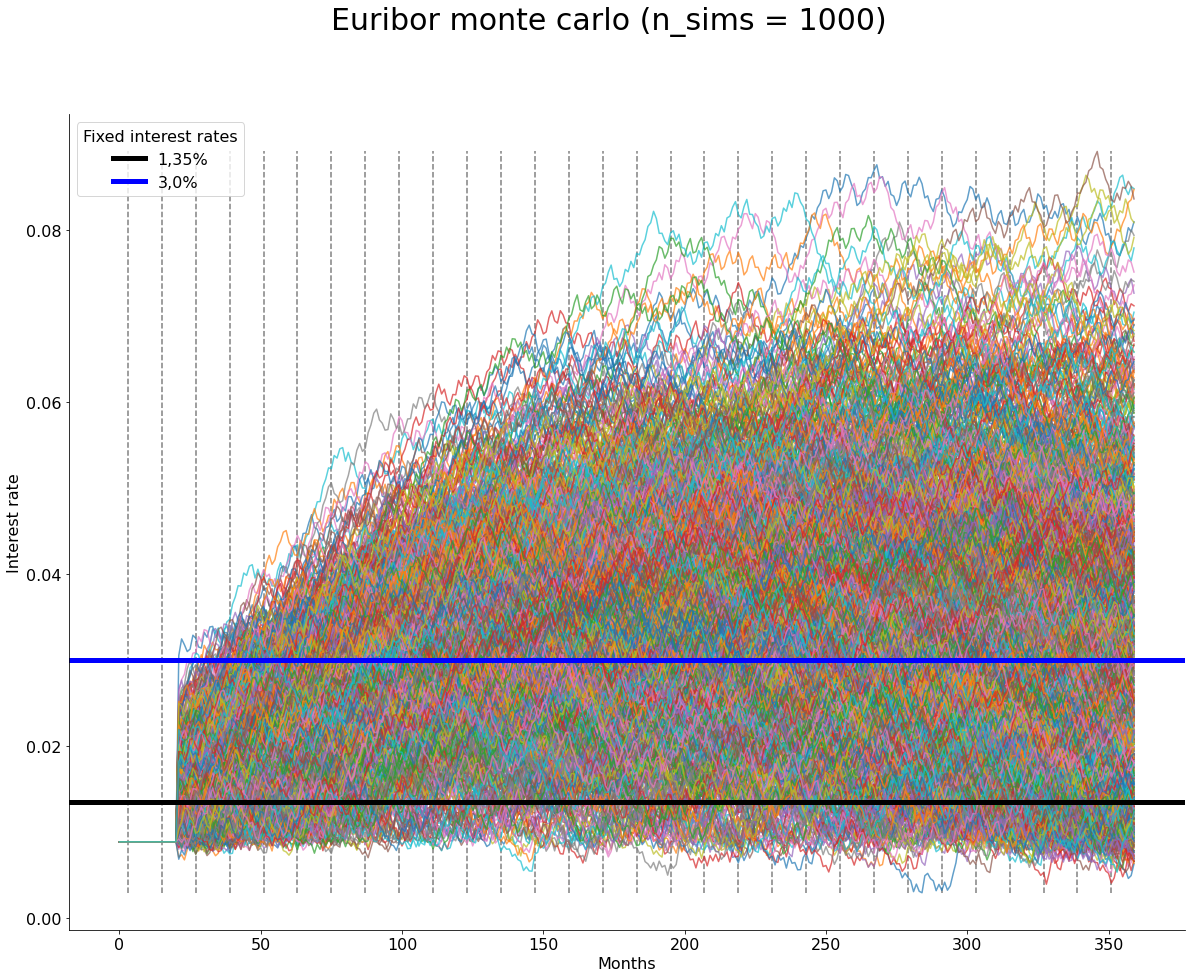

In [26]:
amount = 150000
fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle(f'Euribor monte carlo (n_sims = {n_sims})', fontsize=30)
for i in s[:]:
    ax.plot(i, alpha=0.7)
    
ax.axhline(0.0135, color='black', lw=5, label='1,35%')
ax.axhline(0.03, color='blue', lw=5, label='3,0%')
ax.legend(title='Fixed interest rates')
ax.xaxis.label.set_text('Months')
ax.yaxis.label.set_text('Interest rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(3, n_months, 12):
    ax.vlines(i, min_boundary , max_boundary, color='black', linestyle='dashed', alpha=0.5)


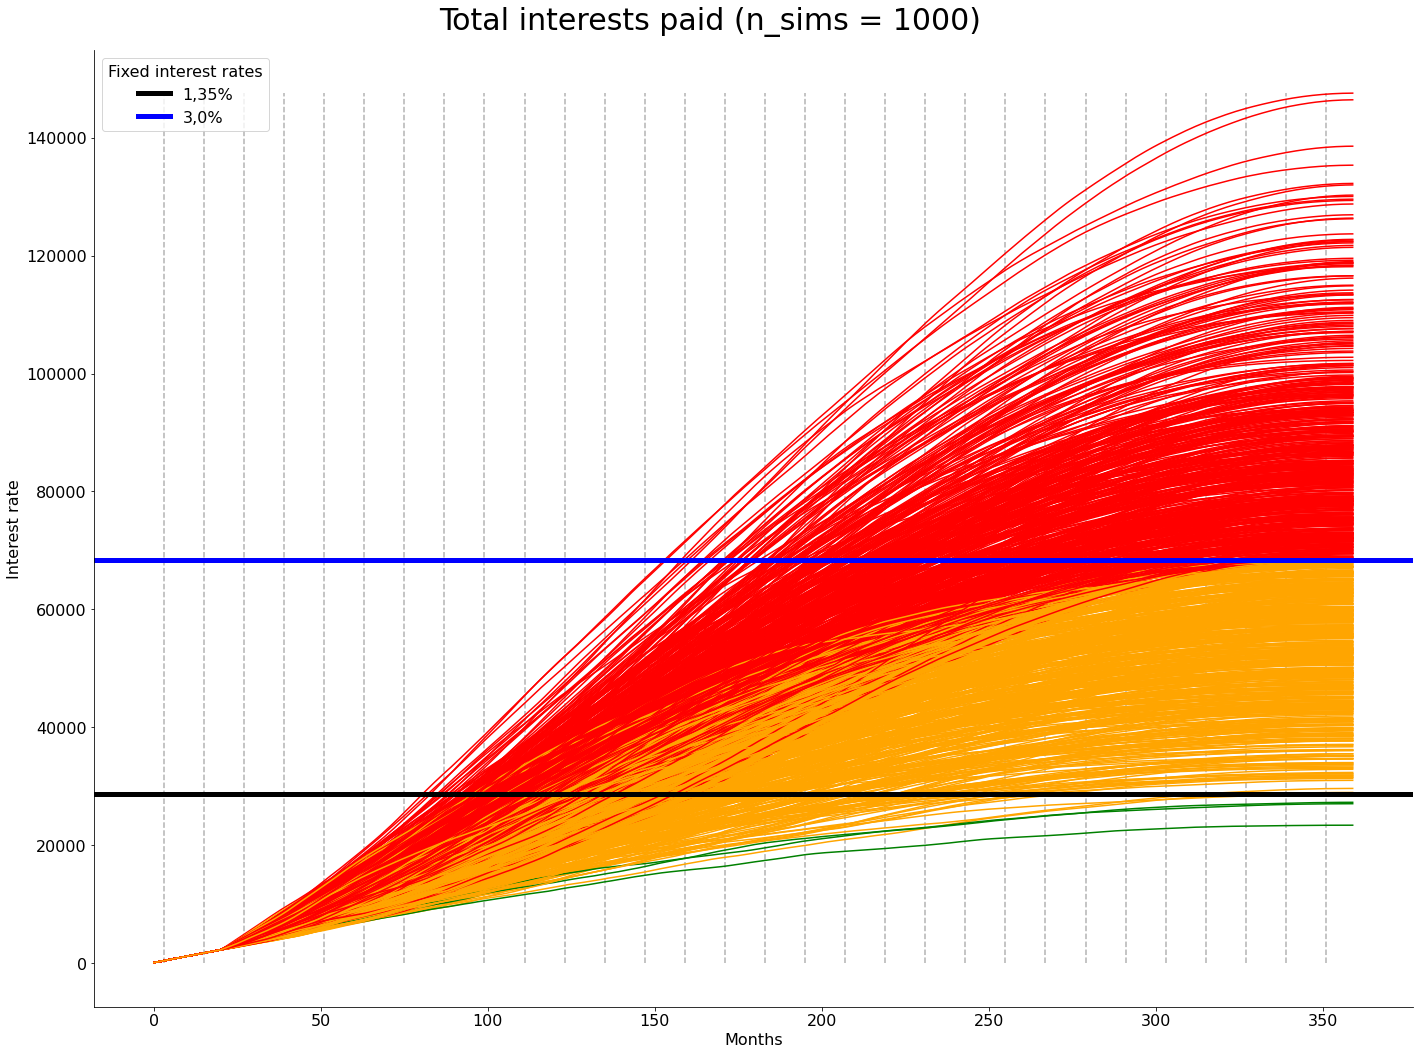

In [27]:

fig, ax = plt.subplots(figsize=(20,15), tight_layout=True)
fig.suptitle(f'Total interests paid (n_sims = {n_sims})', fontsize=30)
min_interest = 0
max_interest = 0
for i in s:
    amount, fee, interest = mortgage_life(150000, i)
    cum_interest = np.cumsum(interest)
    if cum_interest.max() > max_interest: max_interest = cum_interest.max()
    color = 'green'
    if cum_interest[-1] > fix_cum_interest[-1] and cum_interest[-1] < high_cum_interest[-1]:
        color = 'orange'
    if cum_interest[-1] > high_cum_interest[-1]:
        color = 'red'
        
    ax.plot(cum_interest, color=color)
    
ax.axhline(fix_cum_interest[-1], color='black', lw=5, label='1,35%')
ax.axhline(high_cum_interest[-1], color='blue', lw=5, label='3,0%')
ax.legend(title='Fixed interest rates')
ax.xaxis.label.set_text('Months')
ax.yaxis.label.set_text('Interest rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(3, n_months, 12):
    ax.vlines(i, min_interest, max_interest, color='black', linestyle='dashed', alpha=0.3)